# This notebook examines general trends in FAC data
A more thorough writeup can be found in https://drive.google.com/open?id=1U6stzP7qhqB3B10kNYnWdlgtAibwoFEI6cuKOSSq-ZU

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

processed_path = '/data/ihwang/data_journalism/allfac/processed/'
df_general = pd.read_pickle(processed_path + 'general.pkl')
# print('General DF\n', df_general.head())

# Agency prefix dictionary:
with open(processed_path + 'agency_dict', 'rb') as f_w:
    agency_dict = pickle.load(f_w)
# Entity code dictionary:
with open(processed_path + 'entity_dict', 'rb') as f_w:
    entity_dict = pickle.load(f_w)

## Plot percent of all audits by entity type

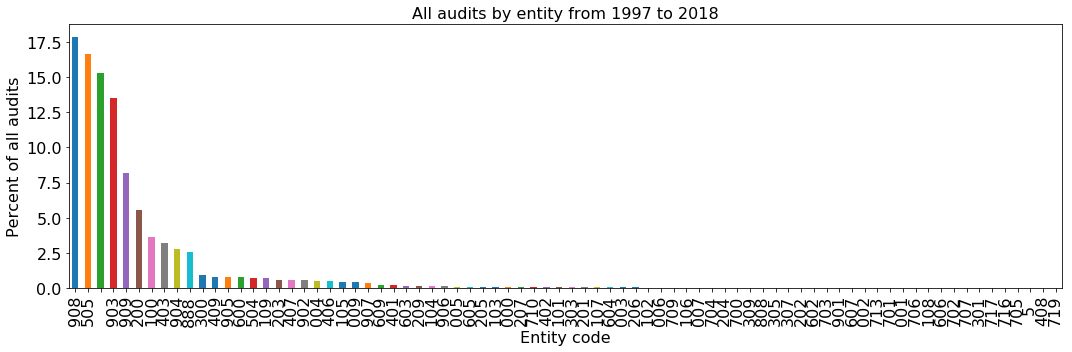

Total number of audits: 838217


In [2]:
fig, axes = plt.subplots(figsize=(15, 5))
entity_groups = df_general.groupby('TYPEOFENTITY').size().sort_values(ascending=False) / len(df_general) * 100
percent_audits_plot = entity_groups.plot(kind='bar', fontsize=16)
percent_audits_plot.set_xlabel('Entity code', fontsize=16)
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16)
percent_audits_plot.set_title(
    'All audits by entity from %s to %s' %(min(df_general['AUDITYEAR']), max(df_general['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_general))

## Plot percent of all audits by state

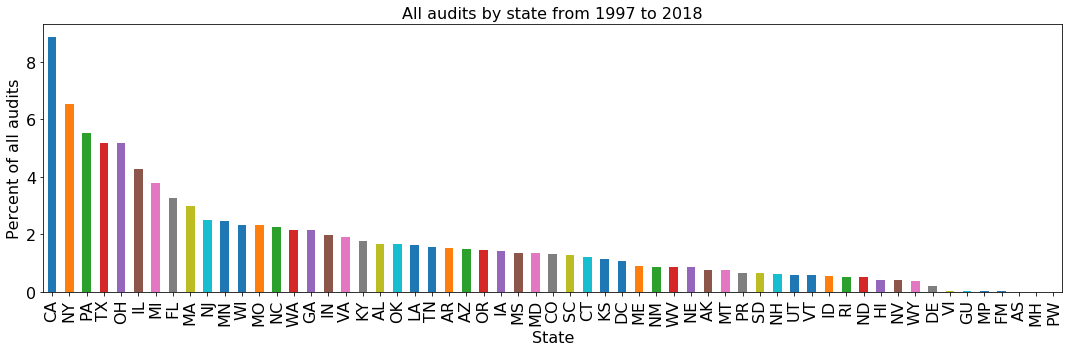

Total number of audits: 838217


In [3]:
fig, axes = plt.subplots(figsize=(15, 5))
entity_groups = df_general.groupby('STATE').size().sort_values(ascending=False) / len(df_general) * 100
percent_audits_plot = entity_groups.plot(kind='bar', fontsize=16)
percent_audits_plot.set_xlabel('State', fontsize=16)
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16)
percent_audits_plot.set_title(
    'All audits by state from %s to %s' %(min(df_general['AUDITYEAR']), max(df_general['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_general))

## Findings for fields related to finances on all Q, A or D audits
* Financial Statements (TYPEREPORT_FS): opinion = U, Q, A or D, but focus on Q, A and D since the U's are majority and the other fields are super minorities
* Questioned costs (QCOSTS): finding = Y or N

KeyError: "['X'] not in index"

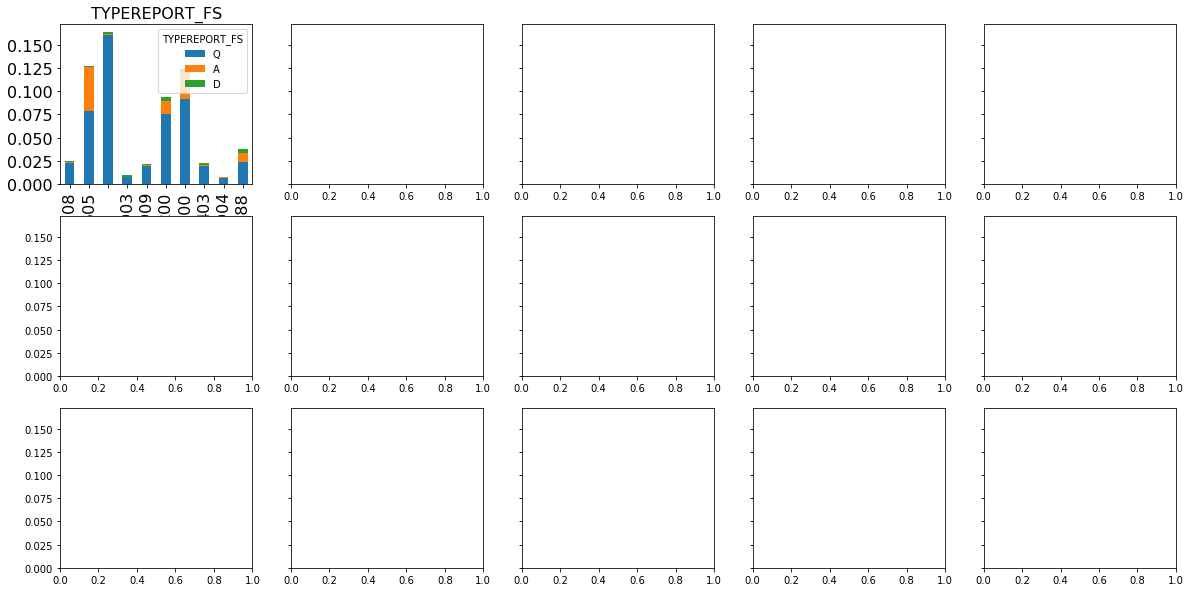

In [12]:
sortbys = ['TYPEOFENTITY', 'OVERSIGHTAGENCY', 'STATE']
fields = ['TYPEREPORT_FS', 'QCOSTS', 'REPORTABLECONDITION', 'MATERIALNONCOMPLIANCE', 'MATERIALWEAKNESS']


fig, axes = plt.subplots(nrows=len(sortbys), ncols=len(fields), figsize=(20, 10), sharey=True)
for (i, sortby) in enumerate(sortbys):
    top_sortby = df_general[sortby].value_counts().head(10).index
    df_top_sortby = df_general[df_general[sortby].isin(top_sortby)]
    for (j, field) in enumerate(fields):
        series_top_sorted = df_top_sortby.groupby(sortby)[field].value_counts()
        df_top_sorted = series_top_sorted.reindex(index=top_sortby, level=0).unstack()
        df_top_normalized = df_top_sorted.div(df_top_sorted.sum(axis=1), axis=0)
        if 'TYPEREPORT' in field:
            df_plot = df_top_normalized[['Q', 'A', 'D']]
        else:
            df_plot = df_top_normalized[[i for i in ['Y', 'N', 'X']]]
        plot_top_sorted = df_plot.plot(
            kind='bar', fontsize=16, stacked=True, ax=axes[i, j]
        )
        if i == 0:
            plot_top_sorted.set_title(field, fontsize=16)
        plot_top_sorted.set_xlabel(sortby, fontsize=16)
plt.tight_layout()
plt.show()